# Brown 

In [11]:
import nltk
print(nltk.corpus.brown.tagged_words())

from nltk.corpus import brown
print(brown.words())

brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])
print("Probability = ", unigram_tagger.evaluate(brown_tagged_sents))

# importing the required dependencies and corpus
import nltk
from nltk.corpus import brown

# tagging the words from the news category
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')

# testing for ambiguity among the POS tags
data = nltk.ConditionalFreqDist((word.lower(), tag)
for (word, tag) in brown_news_tagged)
for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]
['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]
VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 
Probability =  0.9349006503968017
best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


# Gutenberg

In [12]:
import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize

sample = gutenberg.raw("bible-kjv.txt")
tok = sent_tokenize(sample)
print(tok[5:15])

for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

# importing the required corpora and dependencies
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.corpus import gutenberg

# using english stop words
stop_words = set(stopwords.words('english'))

# importing the file "bible-kjv.txt" from the gutenberg corpus
txt = gutenberg.raw("bible-kjv.txt")  

# tokenizing the text file from the corpus
tok = sent_tokenize(txt)

# extracting a section out of the file
tokenize = tok[5:15]

# tagging 
for i in tokenize:
    wordsList = nltk.word_tokenize(i)
    wordsList = [w for w in wordsList if not w in stop_words] 
    tagged = nltk.pos_tag(wordsList)
    print(tagged)

['1:5 And God called the light Day, and the darkness he called Night.', 'And the evening and the morning were the first day.', '1:6 And God said, Let there be a firmament in the midst of the waters,\nand let it divide the waters from the waters.', '1:7 And God made the firmament, and divided the waters which were\nunder the firmament from the waters which were above the firmament:\nand it was so.', '1:8 And God called the firmament Heaven.', 'And the evening and the\nmorning were the second day.', '1:9 And God said, Let the waters under the heaven be gathered together\nunto one place, and let the dry land appear: and it was so.', '1:10 And God called the dry land Earth; and the gathering together of\nthe waters called he Seas: and God saw that it was good.', '1:11 And God said, Let the earth bring forth grass, the herb yielding\nseed, and the fruit tree yielding fruit after his kind, whose seed is\nin itself, upon the earth: and it was so.', '1:12 And the earth brought forth grass, and

# Inaugural

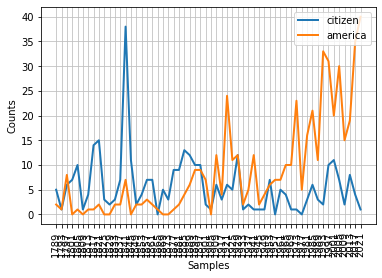

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [13]:
# importing nltk
import nltk 

# importing the inaugural corpus
from nltk.corpus import inaugural

# counting the occurrences 
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids() 
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target)) #convert the corpus to lowercase and examine

# plotting the curve 
cfd.plot()

# Names

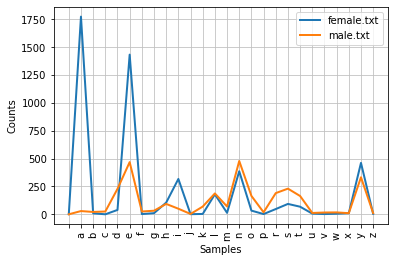

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [14]:
# importing nltk 
import nltk

# importing the names corpus and storing it in a variable 
names = nltk.corpus.names

# comparing the gender-wise ambiguous names
cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid))

# plotting the Samples vs Counts curve
cfd.plot()

# Parse Tree

In [26]:
# Creating a Parse Tree through Grammar
import nltk
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent):
    tree.draw()

# importing the treebank corpus
from nltk.corpus import treebank

# parsing a file
tree1 = treebank.parsed_sents('wsj_0001.mrg')[0]
# displaying the parse tree
tree1.draw()

# parsing another file
tree2 = treebank.parsed_sents('wsj_0002.mrg')[0]
# displaying the parse tree
tree2.draw()

# POS Tagging

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))

txt = "Sukanya, Rajib and Naba are my good friends. " \
    "Sukanya is getting married next year. " \
    "Marriage is a big step in one’s life." \
    "It is both exciting and frightening. " \
    "But friendship is a sacred bond between people." \
    "It is a special kind of love between us. " \
    "Many of you must have tried searching for a friend "\
    "but never found the right one."
  
# sent_tokenize is one of instances of 
# PunktSentenceTokenizer from the nltk.tokenize.punkt module
  
tokenized = sent_tokenize(txt)
for i in tokenized:
      
    # Word tokenizers is used to find the words 
    # and punctuation in a string
    wordsList = nltk.word_tokenize(i)
  
    # removing stop words from wordList
    wordsList = [w for w in wordsList if not w in stop_words] 
  
    # POS-tagger. 
    tagged = nltk.pos_tag(wordsList)
    print(tagged)

[('Sukanya', 'NNP'), (',', ','), ('Rajib', 'NNP'), ('Naba', 'NNP'), ('good', 'JJ'), ('friends', 'NNS'), ('.', '.')]
[('Sukanya', 'NNP'), ('getting', 'VBG'), ('married', 'VBN'), ('next', 'JJ'), ('year', 'NN'), ('.', '.')]
[('Marriage', 'NN'), ('big', 'JJ'), ('step', 'NN'), ('one', 'CD'), ('’', 'NN'), ('life.It', 'NN'), ('exciting', 'VBG'), ('frightening', 'NN'), ('.', '.')]
[('But', 'CC'), ('friendship', 'NN'), ('sacred', 'VBD'), ('bond', 'NN'), ('people.It', 'NN'), ('special', 'JJ'), ('kind', 'NN'), ('love', 'VB'), ('us', 'PRP'), ('.', '.')]
[('Many', 'JJ'), ('must', 'MD'), ('tried', 'VB'), ('searching', 'VBG'), ('friend', 'NN'), ('never', 'RB'), ('found', 'VBD'), ('right', 'JJ'), ('one', 'CD'), ('.', '.')]


# UDHR

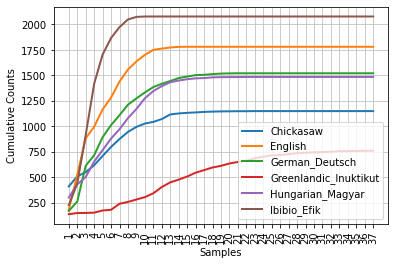

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [17]:
# importing nltk
import nltk 

# importing the corpus udhr
from nltk.corpus import udhr

# selected languages for testing
languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']

# examining the difference in word lengths
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))

# plotting the Samples vs Counts curve
cfd.plot(cumulative=True)

# WebText

[nltk_data] Downloading package webtext to C:\Users\ADMIN/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


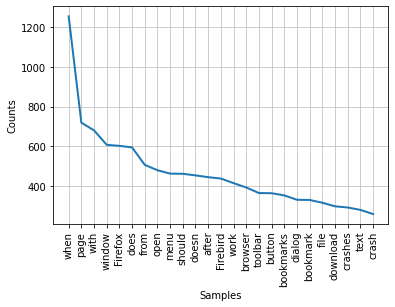

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
# importing nltk 
import nltk

# importing the webtext corpus
from nltk.corpus import webtext

# downloading the webtext package 
nltk.download('webtext')
wt_words = webtext.words('firefox.txt')
data_analysis = nltk.FreqDist(wt_words)

# taking the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
data_analysis = nltk.FreqDist(filter_words)

# plotting the Words vs Counts curve
data_analysis.plot(25, cumulative=False)